In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer


In [2]:
penguins = sns.load_dataset('penguins')

print("Sample of Penguins Dataset:")
print(penguins.head())


Sample of Penguins Dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [3]:
print("Missing values in each column:")
print(penguins.isnull().sum())


Missing values in each column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [4]:
df = penguins[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
               'body_mass_g', 'species', 'sex']].copy()

print("Selected columns:")
print(df.head())


Selected columns:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0            39.1           18.7              181.0       3750.0  Adelie   
1            39.5           17.4              186.0       3800.0  Adelie   
2            40.3           18.0              195.0       3250.0  Adelie   
3             NaN            NaN                NaN          NaN  Adelie   
4            36.7           19.3              193.0       3450.0  Adelie   

      sex  
0    Male  
1  Female  
2  Female  
3     NaN  
4  Female  


In [5]:
num_cols = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

imputer_num = SimpleImputer(strategy='mean')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

print("After handling missing numerical values:")
print(df.head())


After handling missing numerical values:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0        39.10000       18.70000         181.000000  3750.000000  Adelie   
1        39.50000       17.40000         186.000000  3800.000000  Adelie   
2        40.30000       18.00000         195.000000  3250.000000  Adelie   
3        43.92193       17.15117         200.915205  4201.754386  Adelie   
4        36.70000       19.30000         193.000000  3450.000000  Adelie   

      sex  
0    Male  
1  Female  
2  Female  
3     NaN  
4  Female  


In [6]:
cat_cols = ['species', 'sex']

imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

print("After handling missing categorical values:")
print(df.head())


After handling missing categorical values:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g species  \
0        39.10000       18.70000         181.000000  3750.000000  Adelie   
1        39.50000       17.40000         186.000000  3800.000000  Adelie   
2        40.30000       18.00000         195.000000  3250.000000  Adelie   
3        43.92193       17.15117         200.915205  4201.754386  Adelie   
4        36.70000       19.30000         193.000000  3450.000000  Adelie   

      sex  
0    Male  
1  Female  
2  Female  
3    Male  
4  Female  


In [7]:
encoder_species = LabelEncoder()
encoder_sex = LabelEncoder()

df['species'] = encoder_species.fit_transform(df['species'])
df['sex'] = encoder_sex.fit_transform(df['sex'])

print("After encoding categorical values:")
print(df.head())


After encoding categorical values:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  species  sex
0        39.10000       18.70000         181.000000  3750.000000        0    1
1        39.50000       17.40000         186.000000  3800.000000        0    0
2        40.30000       18.00000         195.000000  3250.000000        0    0
3        43.92193       17.15117         200.915205  4201.754386        0    1
4        36.70000       19.30000         193.000000  3450.000000        0    0


In [8]:
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

print("After feature scaling:")
print(df.head())


After feature scaling:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  species  sex
0   -8.870812e-01   7.877425e-01          -1.422488    -0.565789        0    1
1   -8.134940e-01   1.265563e-01          -1.065352    -0.503168        0    0
2   -6.663195e-01   4.317192e-01          -0.422507    -1.192003        0    0
3   -1.307172e-15   1.806927e-15           0.000000     0.000000        0    1
4   -1.328605e+00   1.092905e+00          -0.565361    -0.941517        0    0


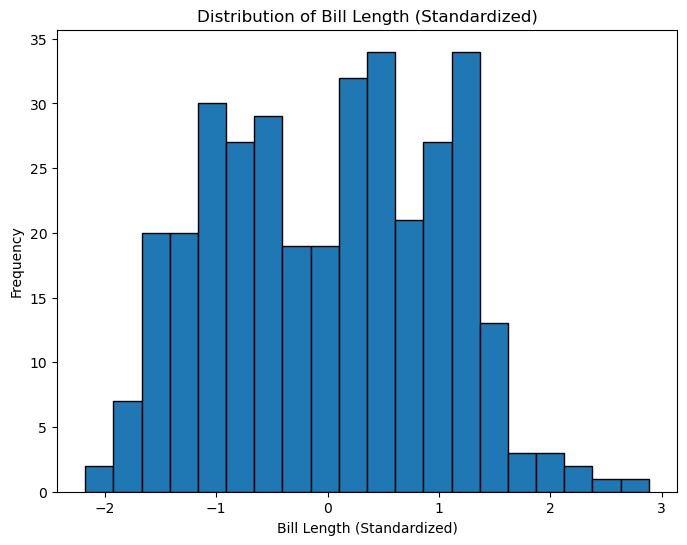

In [9]:
plt.figure(figsize=(8, 6))
plt.hist(df['bill_length_mm'], bins=20, edgecolor='black')
plt.title('Distribution of Bill Length (Standardized)')
plt.xlabel('Bill Length (Standardized)')
plt.ylabel('Frequency')
plt.show()


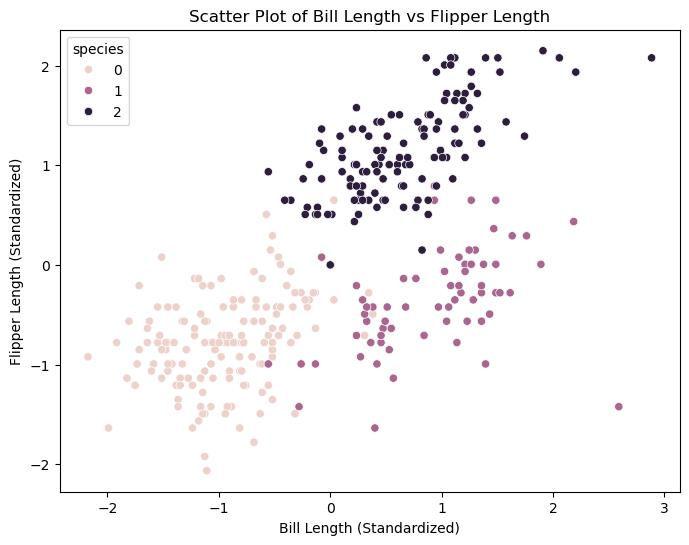

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=df)
plt.title('Scatter Plot of Bill Length vs Flipper Length')
plt.xlabel('Bill Length (Standardized)')
plt.ylabel('Flipper Length (Standardized)')
plt.show()


Correlation Matrix:
                   bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   
species                  0.728674      -0.741335           0.851160   
sex                      0.322338       0.354374           0.243556   

                   body_mass_g   species       sex  
bill_length_mm        0.595110  0.728674  0.322338  
bill_depth_mm        -0.471916 -0.741335  0.354374  
flipper_length_mm     0.871202  0.851160  0.243556  
body_mass_g           1.000000  0.747726  0.408210  
species               0.747726  1.000000  0.010240  
sex                   0.408210  0.010240  1.000000  


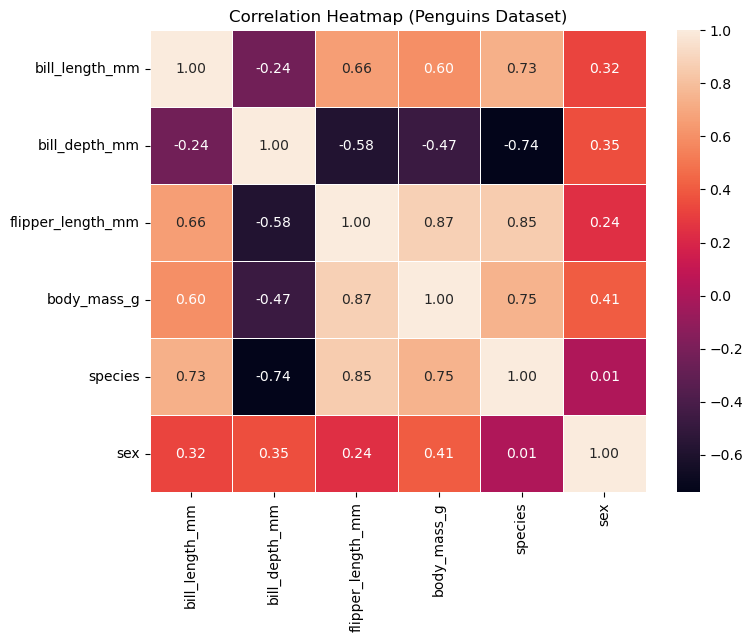

In [11]:
correlation_matrix = df.corr()

print("Correlation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap (Penguins Dataset)')
plt.show()
